## Absorbing Markov Chain for Voting Decision Analysis

In [4]:
import numpy as np
import pandas as pd

# Define the transition matrix P
P = np.array([
    [1, 0, 0, 0, 0],  # X (Absorbing state)
    [0, 1, 0, 0, 0],  # Y (Absorbing state)
    [1/4, 1/4, 0, 1/2, 0],  # A to {X, Y, B}
    [3/16, 9/16, 1/4, 0, 0],  # B to {X, Y, A}
    [0, 1/3, 1/3, 1/3, 0]  # C to {Y, A, B}
])

# Extract sub-matrices Q and R
Q = P[2:, 2:]
R = P[2:, :2]

# Compute the fundamental matrix N = (I - Q)^-1
I = np.eye(Q.shape[0])
N = np.linalg.inv(I - Q)

# Compute the absorbing probabilities B = N * R
B = np.dot(N, R)

# Initial vote distribution π_T^(0) where A, B, and C each start with 1/3 of votes
pi_0 = np.array([1/3, 1/3, 1/3])

# Compute final vote proportions for X and Y
final_proportions = np.dot(pi_0, B)

# Display results using Pandas DataFrames
def display_matrix(matrix, row_labels, col_labels, title):
    df = pd.DataFrame(matrix, index=row_labels, columns=col_labels)
    print(f"\n{title}:")
    print(df, "\n")

# Define labels for matrices
t_states = ['A', 'B', 'C']
a_states = ['X', 'Y']

# Display Matrices
display_matrix(Q, t_states, t_states, "Transient State Matrix (Q)")
display_matrix(R, t_states, a_states, "Absorbing Transition Matrix (R)")
display_matrix(N, t_states, t_states, "Fundamental Matrix (N)")
display_matrix(B, t_states, a_states, "Absorbing Probability Matrix (B)")

# Display final probabilities
df_final = pd.DataFrame(final_proportions.reshape(1, -1), columns=['X', 'Y'])
print("\nFinal probability distribution of votes:")
print(df_final)



Transient State Matrix (Q):
          A         B    C
A  0.000000  0.500000  0.0
B  0.250000  0.000000  0.0
C  0.333333  0.333333  0.0 


Absorbing Transition Matrix (R):
        X         Y
A  0.2500  0.250000
B  0.1875  0.562500
C  0.0000  0.333333 


Fundamental Matrix (N):
          A         B    C
A  1.142857  0.571429  0.0
B  0.285714  1.142857  0.0
C  0.476190  0.571429  1.0 


Absorbing Probability Matrix (B):
          X         Y
A  0.392857  0.607143
B  0.285714  0.714286
C  0.226190  0.773810 


Final probability distribution of votes:
          X         Y
0  0.301587  0.698413


## Graph Visualization

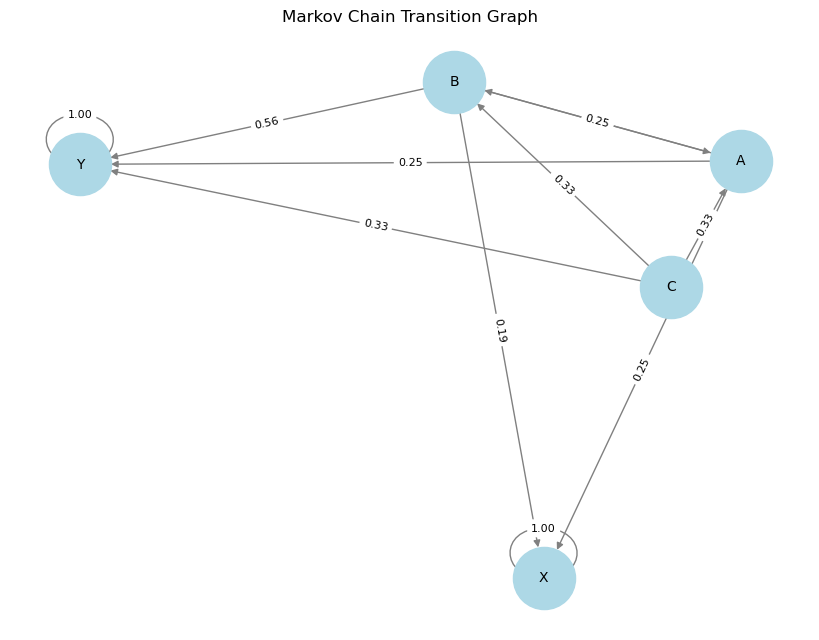

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Visualizing the Markov Chain using NetworkX
def draw_markov_chain(P, state_labels):
    G = nx.DiGraph()
    num_states = len(state_labels)
    
    for i in range(num_states):
        for j in range(num_states):
            if P[i, j] > 0:
                G.add_edge(state_labels[i], state_labels[j], weight=P[i, j])
    
    pos = nx.spring_layout(G)
    labels = {edge: f"{G[edge[0]][edge[1]]['weight']:.2f}" for edge in G.edges}
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', edge_color='gray', font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    plt.title("Markov Chain Transition Graph")
    plt.show()

# Define all states including absorbing and transient states
all_states = ['X', 'Y', 'A', 'B', 'C']
draw_markov_chain(P, all_states)